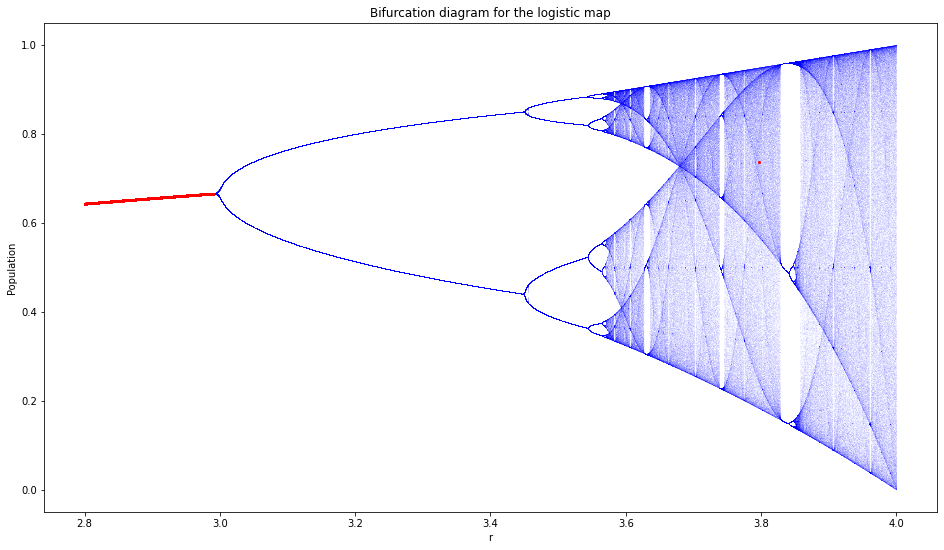

In [1]:
import numpy as np
import matplotlib.pyplot as plt

start_r, end_r = 2.8, 4
accuracy = 0.0001
num_iterations = 600
num_points = 200
populations = np.zeros(num_iterations)

fig, ax = plt.subplots(figsize=(16, 9))

critical_points = []
populations[0] = np.random.rand()
for r in np.arange(start_r, end_r, accuracy):
    for i in range(num_iterations - 1):
        populations[i+1] = r * populations[i] * (1 - populations[i])

    ax.plot([r]*num_points, populations[num_iterations-num_points:], 'b.', markersize=.02)
    
    # Check for convergence to a single point
    if np.abs(populations[-1] - populations[-2]) < 0.0001:
        critical_points.append((r, populations[-1]))

# Plot the critical points on the diagram
for r, p in critical_points:
    ax.plot(r, p, 'r.', markersize=4)

ax.set(xlabel='r', ylabel='Population', title='Bifurcation diagram for the logistic map')
plt.show()


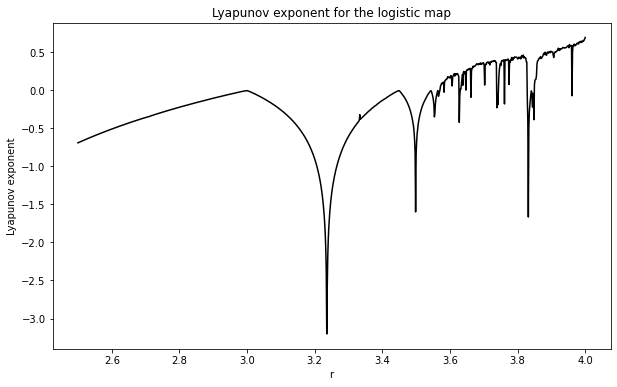

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(r, x):
    return r * x * (1 - x)

def lyapunov_exponent(r, x0, n):
    """Calculate the Lyapunov exponent for the logistic map."""
    x = x0
    sum = 0
    for i in range(n):
        # Calculate the derivative of the map
        f_prime = r - 2 * r * x
        # Update the sum
        sum += np.log(abs(f_prime))
        # Apply the map
        x = logistic_map(r, x)
    # Calculate the average
    return sum / n

# Range of values for r
r_min, r_max = 2.5, 4
# Number of points to sample for r
num_r = 1000
# Number of iterations to reach the attractor
n_iter = 1000
# Number of iterations to average over for the Lyapunov exponent
n_lyap = 1000
# Initial value of x
x0 = 0.1

# Sample values for r
r_vals = np.linspace(r_min, r_max, num_r)
# Calculate the Lyapunov exponent for each r
lyap_vals = np.zeros_like(r_vals)
for i in range(len(r_vals)):
    lyap_vals[i] = lyapunov_exponent(r_vals[i], x0, n_lyap)

# Plot the Lyapunov exponent
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(r_vals, lyap_vals, 'k')
ax.set_xlabel('r')
ax.set_ylabel('Lyapunov exponent')
ax.set_title('Lyapunov exponent for the logistic map')
plt.show()
